In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("advertising.csv")

In [34]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
#‼ satışa en fazla etki eden tv > radio > newspaper

In [11]:
df.shape

(200, 4)

<Axes: xlabel='Sales', ylabel='count'>

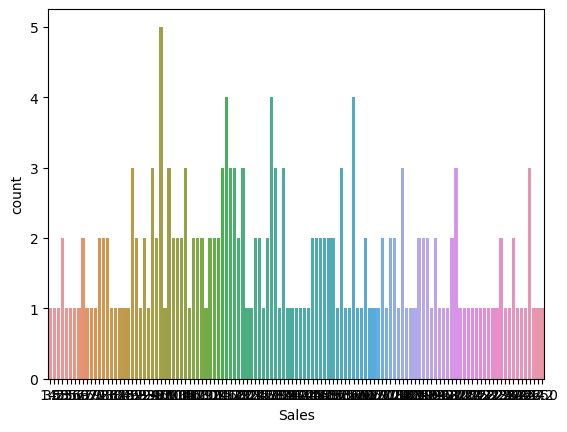

In [12]:
sns.countplot(x=df["Sales"])

In [9]:
abs(df.corr()['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

<Axes: >

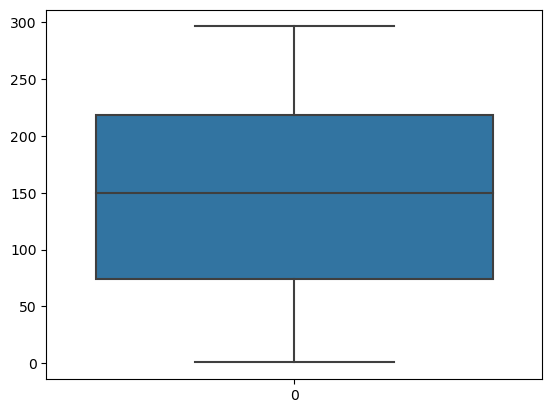

In [13]:
sns.boxplot(df.TV)

<Axes: >

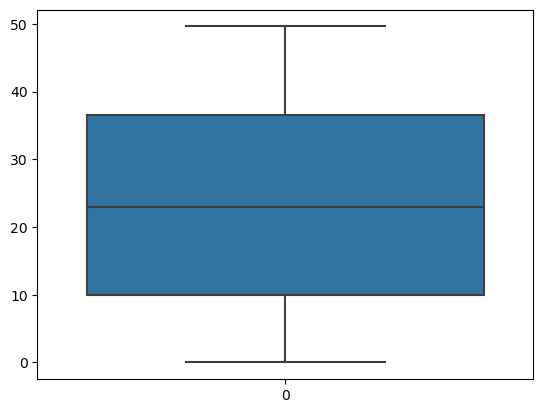

In [14]:
sns.boxplot(df.Radio)

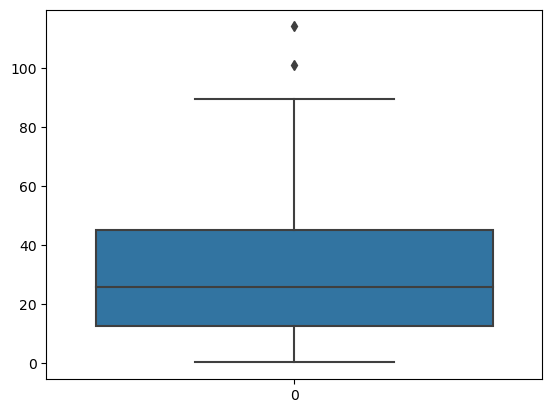

In [24]:
sns.boxplot(df.Newspaper);
 

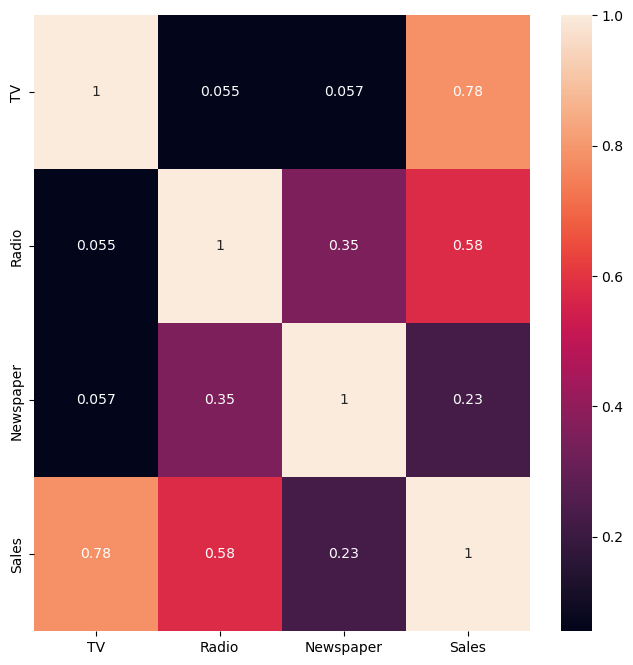

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

### MODELLİNG

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error

lr=LinearRegression()

In [36]:
x=df.drop("Sales",axis=1)
y=df[["Sales"]]

In [37]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [38]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

In [40]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train)

In [41]:
y_pretest = regmodel.predict(x_test)

In [42]:
(mean_squared_error(y_test,y_pretest))**0.5

1.7815996615334502

In [43]:
r2_score(y_test,y_pretest)

0.899438024100912

In [44]:
model=lr.fit(x_train,y_train)
tahmin=model.predict(x_test)
(mean_squared_error(tahmin,y_test))**0.5

1.7815996615334502

In [45]:
r2_score(tahmin,y_test)

0.8791069137120033

In [46]:
from sklearn.linear_model import Ridge, Lasso
R=Ridge()
L=Lasso()

In [47]:
R.fit(x_train,y_train)

Ridge()

In [48]:
tahmin2=R.predict(x_test)

In [49]:
(mean_squared_error(tahmin2,y_test))**0.5

1.7815989481622212

In [50]:
r2_score(tahmin2,y_test)

0.8791049542584578

In [51]:
L.fit(x_train,y_train)

Lasso()

In [52]:
tahmin3=L.predict(x_test)
(mean_squared_error(tahmin3,y_test))**0.5

1.7730458272046823

In [53]:
r2_score(tahmin3,y_test)

0.8777534897716464